In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
df = pd.read_csv('/content/car.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape

(11914, 16)

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.count()

,0
Make,11914
Model,11914
Year,11914
Engine Fuel Type,11911
Engine HP,11845
Engine Cylinders,11884
Transmission Type,11914
Driven_Wheels,11914
Number of Doors,11908
Market Category,8172


In [ ]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [ ]:
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)
df.dropna(subset=['Market Category'], inplace=True)

<ipython-input-32-afdc97094e5f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
<ipython-input-32-afdc97094e5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [ ]:
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['MSRP'] >= (Q1 - 1.5 * IQR)) & (df['MSRP'] <= (Q3 + 1.5 * IQR))]

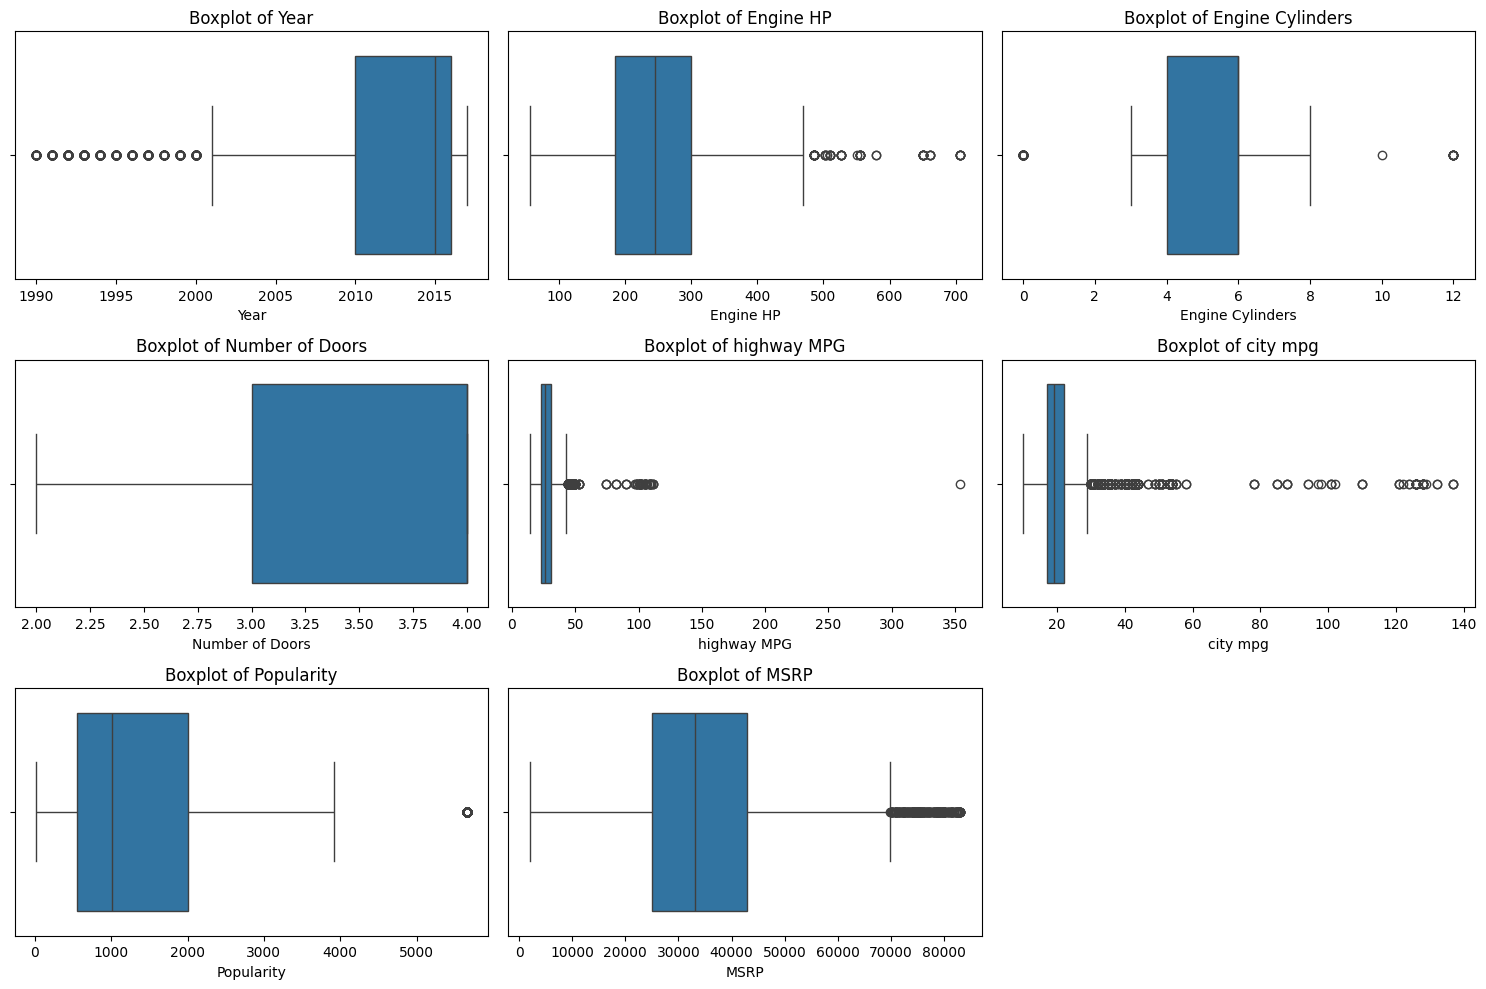

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust the number of columns as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
def remove_outliers(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Remove outliers from the DataFrame
cleaned_df = remove_outliers(df)

# Display the cleaned DataFrame
print(cleaned_df)

           Make   Model  Year                Engine Fuel Type  Engine HP  \
64     Chrysler     200  2015        flex-fuel (unleaded/E85)      184.0   
65     Chrysler     200  2015        flex-fuel (unleaded/E85)      184.0   
66     Chrysler     200  2015        flex-fuel (unleaded/E85)      295.0   
67     Chrysler     200  2015        flex-fuel (unleaded/E85)      184.0   
68     Chrysler     200  2015        flex-fuel (unleaded/E85)      184.0   
...         ...     ...   ...                             ...        ...   
11909     Acura     ZDX  2012     premium unleaded (required)      300.0   
11910     Acura     ZDX  2012     premium unleaded (required)      300.0   
11911     Acura     ZDX  2012     premium unleaded (required)      300.0   
11912     Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913   Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
64    

In [ ]:
cleaned_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
64,Chrysler,200,2015,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25170
65,Chrysler,200,2015,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,23950
66,Chrysler,200,2015,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013,29370
67,Chrysler,200,2015,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,21995
68,Chrysler,200,2015,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,36,23,1013,26625


In [ ]:
#1. Most Expensive Car for Each Car Company Make
most_expensive_car = df.loc[df.groupby('Make')['MSRP'].idxmax()]
print(most_expensive_car[['Make', 'Model', 'MSRP']])


                Make                Model   MSRP
8555           Acura                  RLX  65950
475       Alfa Romeo                   4C  68400
8933            Audi                   S7  82900
643              BMW  6 Series Gran Coupe  82800
3934           Buick              Enclave  49625
4174        Cadillac             Escalade  82895
3023       Chevrolet             Corvette  83015
3092        Chrysler            Crossfire  49470
2463           Dodge           Challenger  65945
539             FIAT                 500e  31800
4592            Ford                F-150  63025
11859            GMC             Yukon XL  71665
5203         Genesis                  G80  54550
5696          HUMMER                   H3  43130
7626           Honda                Pilot  47070
4081         Hyundai                Equus  68750
7858        Infiniti                  Q70  67050
6262             Kia                 K900  61900
8293      Land Rover    Range Rover Sport  82695
6479           Lexus

In [ ]:
#2. Most Expensive Convertible Vehicle for Each Company
convertibles = df[df['Vehicle Style'].str.contains('Convertible', na=False)]
most_expensive_convertible = convertibles.loc[convertibles.groupby('Make')['MSRP'].idxmax()]
print(most_expensive_convertible[['Make', 'Model', 'MSRP']])


                Make               Model   MSRP
478       Alfa Romeo                  4C  65900
8632            Audi                RS 4  81900
6610             BMW                  M4  74700
8443           Buick              Reatta   2000
11735       Cadillac                 XLR  81855
2970       Chevrolet            Corvette  83000
3092        Chrysler           Crossfire  49470
9151           Dodge              Shadow   2000
34              FIAT          124 Spider  28195
9178            Ford        Shelby GT500  60110
8848           Honda               S2000  37995
7828        Infiniti     Q60 Convertible  62100
8265      Land Rover  Range Rover Evoque  57700
9042           Lexus              SC 430  68405
3919           Lotus               Elise  57950
7120           Mazda          MX-5 Miata  32655
9681   Mercedes-Benz           SLK-Class  72600
3771      Mitsubishi      Eclipse Spyder  32599
317           Nissan                370Z  49400
7740        Plymouth             Prowler

In [ ]:
#3. List All the Cars Which Are Automatic
automatic_cars = df[df['Transmission Type'] == 'Automatic']
print(automatic_cars[['Make', 'Model']])


Empty DataFrame
Columns: [Make, Model]
Index: []


In [ ]:
#4. Premium Cars of Each Car Company
premium_cars = df[df['MSRP'] > 40000].drop_duplicates()
print(premium_cars[['Make', 'Model', 'MSRP']])


        Make       Model   MSRP
0        BMW  1 Series M  46135
1        BMW    1 Series  40650
6        BMW    1 Series  44100
12       BMW    1 Series  44400
15       BMW    1 Series  48250
...      ...         ...    ...
11908  Acura         ZDX  50520
11909  Acura         ZDX  46120
11910  Acura         ZDX  56670
11911  Acura         ZDX  50620
11912  Acura         ZDX  50920

[2255 rows x 3 columns]


In [ ]:
#5. Average Price of Cars Each Car Company Makes
average_price = df.groupby('Make')['MSRP'].mean().reset_index()
average_price.columns = ['Make', 'Average MSRP']
print(average_price)


             Make  Average MSRP
0           Acura  33520.939271
1      Alfa Romeo  61600.000000
2            Audi  42363.023973
3             BMW  49301.976923
4           Buick  33770.400000
5        Cadillac  52258.214689
6       Chevrolet  34936.891980
7        Chrysler  29978.870370
8           Dodge  26862.685430
9            FIAT  23060.609756
10           Ford  32708.438632
11            GMC  37385.748148
12        Genesis  46616.666667
13         HUMMER  36464.411765
14          Honda  27024.975352
15        Hyundai  26985.957944
16       Infiniti  42253.009119
17            Kia  30149.311927
18     Land Rover  47827.000000
19          Lexus  43495.270833
20        Lincoln  42839.829268
21          Lotus  64532.708333
22       Maserati  76918.923077
23          Mazda  23254.440154
24  Mercedes-Benz  38861.255906
25     Mitsubishi  20286.875000
26         Nissan  30670.264516
27     Oldsmobile  34868.000000
28       Plymouth   4076.820513
29        Pontiac  24728.129870
30      